# Examining Ecological Sustainability around the World:
## National Footprint Accounts Data Exploration

### Data

According to the Global Footprint Network, over 85% of the world population currently lives in countries with an ecological deficit.  

Based on supply and demand principles, an ecological deficit occurs when a country’s human consumption of the environment exceeds the area required to produce resources, absorb carbon dioxide, and assimilate waste.  

As individuals and members of a country’s population, it is important to be aware of how we are utilizing the biosphere’s finite resources.  While most nations in the world run an ecological deficit, this is not a viable option for long term sustainability.  Understanding the rates and trends of ecological deficit by country, population, and land types can help inform decisions to manage and utilize natural resources and move into a more ecologically stable state – an ecological reserve.  

To accomplish this, the Global Footprint Network annually publishes the National Footprints Accounts(NFA).  As the most widely used Ecological Footprint(EF) dataset, which is primarily comprised of public UN datasets with supplementary sources from peer-reviewed scientific journals, quantifies the ecological impact and accesses the overall sustainability of most of the countries around the world from 1961 through 2014.

Before we dive into working with the data, let’s look at some important terms:

<b>Ecological Footprint(EF)</b> - measures the quantity of biological resources/landtypes required to support the population 

<b>Biocapacity(BC)</b> - is the area of biologically productive area available to produce resources, resource regeneration and waste assimilation. 	

<b>Global Hectares(GHA)</b> – Standard unit of measure used throughout dataset. This measurement normalizes the biological productivity across all land types.  Calculated by  summing the total of various production, weighted by the richness of the land they use, is divided by the number of hectares used.

EF and BC are calculated for (in both total global hectares and global hectares per capita): 

<b>Crop land</b> - crop land available or demanded.

<b>Grazing land</b> - grazing land (used for meat, dairy, leather, etc.) Includes global hectares used for grazing, but not   
                      crop land used to produce feed for animals.
                      
<b>Forest land</b> - forest land available (for sequestration and timber, pulp, or timber products) or demanded (for timber, 
                     pulp, or timber products).
                     
<b>Fishing grounds</b> - marine and inland fishing grounds (used for fish & fish products).

<b>Built up land</b> - built-up land (land cover of human infrastructure).

<b>Carbon</b> - average forest required to sequester carbon emissions (for EF only. For BC it's calculated within the forest 
                land section)

For each country and year, Ecological Footprint is calculated with this formula: 

<b>EF Consumption = EF Production + EF Imports - EF Exports</b>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
footprint = pd.read_csv('NFA 2018.csv')
footprint.head(5)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000


Now that we have our data, further exploration into what the data consists of. 

In [3]:
#High level overview of the dataset: how many lines of data, datatypes
footprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 15 columns):
country                     87020 non-null object
ISO alpha-3 code            85660 non-null object
UN_region                   87020 non-null object
UN_subregion                87020 non-null object
year                        87020 non-null int64
record                      87020 non-null object
crop_land                   63530 non-null float64
grazing_land                63530 non-null float64
forest_land                 63530 non-null float64
fishing_ground              63530 non-null float64
built_up_land               63530 non-null float64
carbon                      63530 non-null float64
total                       87020 non-null float64
Percapita GDP (2010 USD)    71410 non-null float64
population                  87020 non-null int64
dtypes: float64(8), int64(2), object(5)
memory usage: 8.3+ MB


In [4]:
#Looking at the unique columns
footprint.columns

Index(['country', 'ISO alpha-3 code', 'UN_region', 'UN_subregion', 'year',
       'record', 'crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'total', 'Percapita GDP (2010 USD)',
       'population'],
      dtype='object')

In [5]:
#Determining the year range
footprint['year'].nunique()

54

In [6]:
#First year data was collected
footprint['year'].min()

1961

In [7]:
#Last year data was collected
footprint['year'].max()

2014

In [8]:
#Understanding the record column
footprint['record'].nunique()

10

In [9]:
#Understanding the record column 
footprint['record'].unique()

array(['BiocapPerCap', 'BiocapTotGHA', 'EFConsPerCap', 'EFConsTotGHA',
       'EFExportsPerCap', 'EFExportsTotGHA', 'EFImportsPerCap',
       'EFImportsTotGHA', 'EFProdPerCap', 'EFProdTotGHA'], dtype=object)

Within the record column, data collected for each country and year include:  

<b>'EFCons...'</b> -Ecological Footprint of Consumption

<b>'EFProd...'</b> - Ecological Footprint of Production

<b>'EFImports...'</b> - Ecological Footprint of Imports

<b>'EFExports...'</b> - Ecological Footprint of Exports

<b>'Biocap...'</b> - Biocapacity 

Each record is collected in both total global hectares per-capita ('...PerCap')  and total global hectares ('...TotGHA) and is reported across all types of landtypes and their sum total.

In [10]:
#Overview of descriptive stats of data, without further context this information doesn't mean much
footprint.describe()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
count,87020.000000,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,8.702000e+04,71410.000000,8.702000e+04
mean,1989.193059,1.465068e+07,6.324612e+06,1.531334e+07,3.576364e+06,1.311909e+06,2.591459e+07,5.217695e+07,10129.722779,6.305956e+07
std,15.490923,1.445766e+08,6.237420e+07,1.798437e+08,3.905889e+07,1.448057e+07,3.448775e+08,5.890184e+08,15646.206882,4.264394e+08
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.150000e-05,115.794000,5.000000e+03
25%,1976.000000,3.027605e-01,7.470049e-02,1.508091e-01,3.252735e-02,0.000000e+00,1.946352e-02,1.313131e+00,988.470000,2.001000e+06
50%,1990.000000,2.841671e+00,2.526463e+00,3.110603e+00,3.670478e+00,3.247780e-02,1.293047e+00,1.858845e+02,3153.740000,6.632500e+06
75%,2003.000000,2.027347e+06,6.580112e+05,1.497303e+06,2.436509e+05,5.794159e+04,9.168465e+05,7.792829e+06,11972.100000,2.056300e+07
max,2014.000000,3.996304e+09,1.576582e+09,5.496461e+09,1.127790e+09,4.649979e+08,1.251963e+10,2.060191e+10,113682.000000,7.265786e+09


In [11]:
#All the countries in the dataset
footprint['country'].unique()

array(['Armenia', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Bangladesh', 'Bermuda',
       'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Aruba', 'Belize',
       'Brunei Darussalam', 'Bulgaria', 'Myanmar', 'Burundi', 'Cameroon',
       'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Sri Lanka', 'Chad', 'Chile',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Cuba', 'Cyprus', 'Czechoslovakia', 'Azerbaijan', 'Benin',
       'Denmark', 'Dominica', 'Dominican Republic', 'Belarus', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Ethiopia PDR',
       'Estonia', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Djibouti', 'Georgia', 'Gabon', 'Gambia',
       'Germany', 'Bosnia and Herzegovina', 'Ghana', 'Kiribati', 'Greece',
       'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guya

In [12]:
#How many countries in dataset
len(footprint['country'].unique())

196

There are 196 countries in the dataset.  However, after exploring the countries above, we can see that 'World' is included in this list.  So, excluding 'World', the number of countries in the data are 195.    

While examining the data, it appears that every country does not have data collected for every year between 1961 and 2014.  

Before conducting further analysis, I would like to determine what countries have data for all 54 years.    

In [13]:
#Calculating the range of years for each country
def year_range(num):
    return num.max()-num.min()+1

In [14]:
#DataFrame of all countries with first year and last year of data collected and the number of years between the two. 
countries_year_range = (footprint
                            .groupby('country')['year']
                            .aggregate([np.min, np.max, year_range])
                            .sort_values(['year_range'], ascending = False)) 
countries_year_range

,amin,amax,year_range
country,,,
Afghanistan,1961,2014,54
Morocco,1961,2014,54
Mali,1961,2014,54
Malta,1961,2014,54
Martinique,1961,2014,54
Mauritania,1961,2014,54
Mauritius,1961,2014,54
Mexico,1961,2014,54
Mongolia,1961,2014,54


After grouping by country and aggregating by the first and last year data was collected and the year range, there are 128 countries with records from 1961 to 2014.   

For my analysis, I would like to examine the all the countries with complete data collection from 1961 to 2014, so I'm creating a new dataframe with just the above data. 

In [15]:
#Commented out reduce size of notebook and help with slow processing times 
#Countries that do not have 54 years of data
#countries_year_range.query('year_range != 54')
#Dropping countries using drop_countries (including World) list to create new dataframe w/ just the countries w/ 54 years of data
#df_complete_footprint = footprint.drop(footprint[footprint.country.isin(drop_countries)].index)

#Created DataFrame with only the records of BiocapPerCap and EFConsPerCap per year for question 2, used this dataframe for question1 
#countries_record = df_complete_footprint.loc[(df_complete_footprint['record'] == 'BiocapPerCap') | (df_complete_footprint['record'] == 'EFConsPerCap')]
#countries_record.to_csv('countries_record.csv')

# Analytic Questions

## 1. What countries, subregions, and regions have the largest populations in 2014?

The first thing I want to do is to get a sense of how the population is distributed geographically. First, I want to look at the data by country and then I'm going to look at the data through the UN subregions and UN regions.

This is a simple question to start off with but important for a couple reasons.  First, it helps us understand how the populations are distributed around the World and identify any immediate trends.  Second, it can help us formulate and inform any further questions while determining at which scale(country, subregion, region) the questions would be most beneficial to ask/answer.  

In [16]:
#Dataset with only the countries with complete data from 1961 to 2014, records only include BiocapPerCap and EFConsPerCap  
countries_record = pd.read_csv('countries_record.csv')
countries_record.head()

,Unnamed: 0,Unnamed: 0.1,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,0,230,Afghanistan,AFG,Asia,Southern Asia,1961,BiocapPerCap,0.544551,0.677892,0.071406,0.000000,0.029707,0.000000,1.323556,NaN,9165000
1,2,232,Afghanistan,AFG,Asia,Southern Asia,1961,EFConsPerCap,0.538864,0.528166,0.086077,0.000053,0.029707,0.028572,1.211439,NaN,9165000
2,10,240,Afghanistan,AFG,Asia,Southern Asia,1962,BiocapPerCap,0.515781,0.663363,0.070071,0.000000,0.028465,0.000000,1.277680,NaN,9344000
3,12,242,Afghanistan,AFG,Asia,Southern Asia,1962,EFConsPerCap,0.506361,0.505987,0.085548,0.000052,0.028465,0.035767,1.162180,NaN,9344000
4,20,250,Afghanistan,AFG,Asia,Southern Asia,1963,BiocapPerCap,0.477027,0.648095,0.068630,0.000000,0.026683,0.000000,1.220435,NaN,9532000


In [17]:
#Creating new dataframe with only 1 record, BiocapPerCap and 2014
countries_record = countries_record.loc[(countries_record.year == 2014) & (countries_record.record == 'BiocapPerCap')]
#Sorting the countries, so I can plot only the 20 largest populations
countries_large = countries_record.sort_values('population',ascending=True).tail(20)

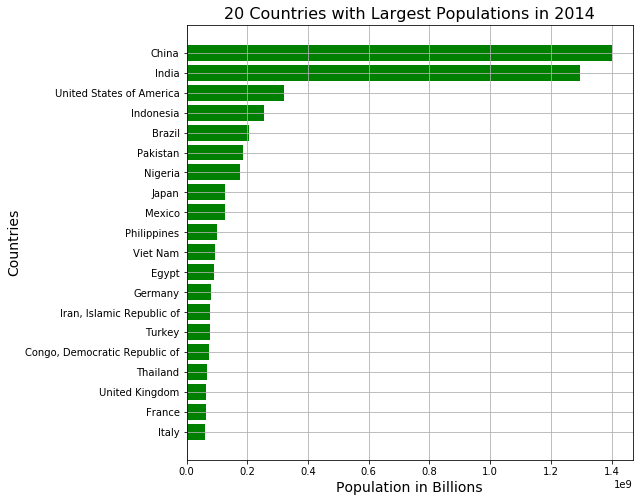

In [18]:
#Plotting countries by population size
plt.figure(figsize=(8,8))
x = countries_large['country']
y = countries_large['population']
plt.barh(x,y, color='green')
plt.title('20 Countries with Largest Populations in 2014', fontsize=16)
plt.xlabel('Population in Billions', fontsize=14)
plt.ylabel('Countries', fontsize=14)
plt.grid()
plt.show()

This plot of the 20 countries with the largest populations in 2014 show us that China and India have, by far, the largest populations in the world.  In fact, each of the populations roughly quadruple the third and fourth largest countries, the United States of America and Indonesia.  

This is not altogether surprising, as China and India are known for having large populations.   

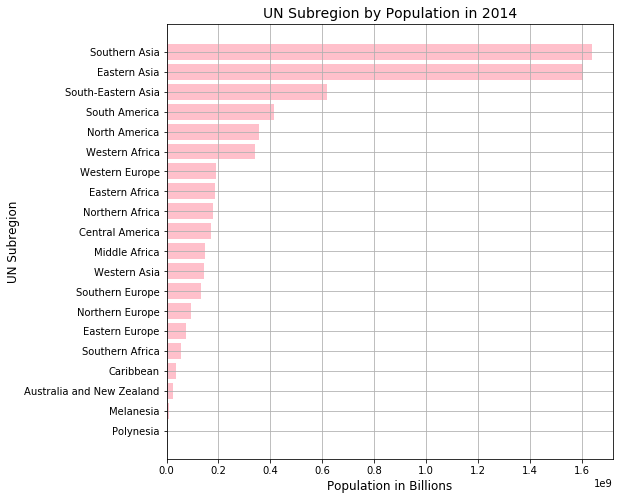

In [19]:
#Plotting UN subregion by population size
plt.figure(figsize=(8,8))
x = ['Polynesia','Melanesia','Australia and New Zealand','Caribbean','Southern Africa','Eastern Europe',
'Northern Europe','Southern Europe','Western Asia','Middle Africa','Central America','Northern Africa',
'Eastern Africa','Western Europe','Western Africa','North America','South America','South-Eastern Asia',
'Eastern Asia','Southern Asia']                
y = [298000, 8350000, 23622000, 37895000, 56372000,75363000,93226000,130792000,144601000,146648000,170111000,
179824000,185128000,190184000,341996000,355099000,413481000,620256000,1605408000,1638902000]
plt.barh(x,y, color='pink')
plt.title('UN Subregion by Population in 2014', fontsize=14)
plt.xlabel('Population in Billions', fontsize=12)
plt.ylabel('UN Subregion', fontsize=12)
plt.grid()
plt.show()

In [20]:
#Distribution of countries by UN subregion
countries_record.groupby('UN_subregion')['country'].nunique().sort_values(ascending=False)

UN_subregion
Western Africa               15
Eastern Africa               12
South America                11
Caribbean                    10
South-Eastern Asia            9
Middle Africa                 8
Western Europe                7
Central America               7
Western Asia                  7
Southern Europe               6
Southern Asia                 6
Northern Europe               6
Eastern Asia                  5
Northern Africa               5
Eastern Europe                4
North America                 3
Melanesia                     2
Polynesia                     2
Southern Africa               2
Australia and New Zealand     1
Name: country, dtype: int64

While examining the largest populations by subregion based on the distribution of countries by population, it is not immediately obvious why the top two or three subregions are Asian in origin.  However, since we just explored the largest populations by country, it unsurprising that the largest populations are from two subregions in Asia.  As China is in Eastern Asia and India is in Southern Asia, it makes sense that these two subregions would have the largest populations.  

To get a clearer sense of the relative population of the other subregions, I'm going to remove the first three Asian subregions. 

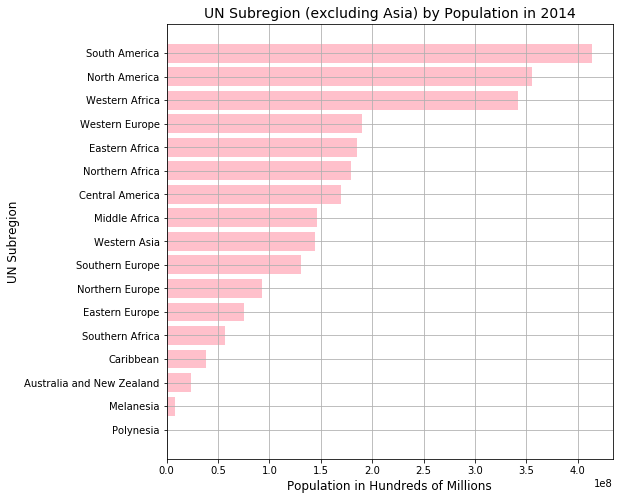

In [21]:
#Plotting UN subregion by population size without Asia
plt.figure(figsize=(8,8))
x = ['Polynesia','Melanesia',                       
'Australia and New Zealand',      
'Caribbean',                      
'Southern Africa',                
'Eastern Europe',                 
'Northern Europe',                
'Southern Europe',               
'Western Asia',                  
'Middle Africa',                 
'Central America',              
'Northern Africa',              
'Eastern Africa',                
'Western Europe',                
'Western Africa',                
'North America',                 
'South America']                
y = [298000, 8350000, 23622000, 37895000, 56372000,75363000,93226000,130792000,144601000,146648000,170111000,
179824000,185128000,190184000,341996000,355099000,413481000]
plt.barh(x,y, color='pink')
plt.title('UN Subregion (excluding Asia) by Population in 2014', fontsize=14)
plt.xlabel('Population in Hundreds of Millions', fontsize=12)
plt.ylabel('UN Subregion', fontsize=12)
plt.grid()
plt.show()

With the Asian subregions removed, the first thing to notice is that the scale changes from billions to hundreds of millions.  So these subregions are degrees smaller than the Asian subregions.

When comparing this chart to the distribution of countries by subregion, it is clear that the frequency of countries in a subregion is not the determining factor of population size.  In other words, just because a subregion has more countries, it does not necessarily mean that they have a larger overall population.  

The last part of the question addresses population size by region.  

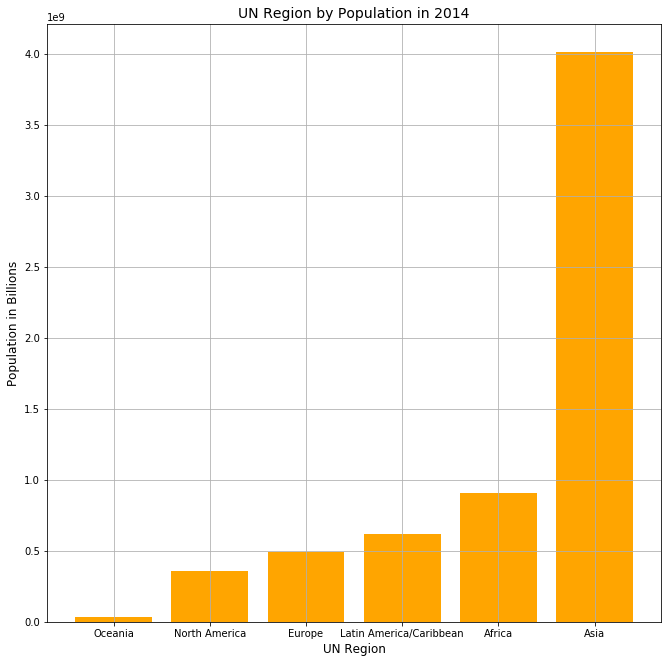

In [22]:
#Plotting UN region by population size
plt.figure(figsize=(11,11))
x = ['Oceania', 'North America', 'Europe', 'Latin America/Caribbean', 'Africa', 'Asia']
y = [32270000, 355099000, 489565000, 621487000, 909968000, 4009167000]
plt.bar(x,y, color='orange')
plt.title('UN Region by Population in 2014', fontsize=14)
plt.xlabel('UN Region', fontsize=12)
plt.ylabel('Population in Billions', fontsize=12)
plt.grid()
plt.show()

In [23]:
#Distribution of countries by UN region
countries_record.groupby('UN_region')['country'].nunique().sort_values(ascending=False)

UN_region
Africa                             42
Latin America and the Caribbean    28
Asia                               27
Europe                             23
Oceania                             5
North America                       3
Name: country, dtype: int64

This chart shows that Asia has the largest population than any other region.  Again, this is consistent with the previous conclusions with China and India as countries with the largest populations and with Southern and Eastern Asia as the subregions with the largest populations.  

Looking at the table above, the frequency of countries is a fair indicator of a region's population.  Given that Asia has two countries with extremely high populations(outliers), it makes sense that although there are only 27 countries in Asia, the population is larger than those of both Africa and Latin America/Caribbean, who both have more countries in their regions. 

Again, by exluding Asia as a region, we can get the relative population of the other regions. 

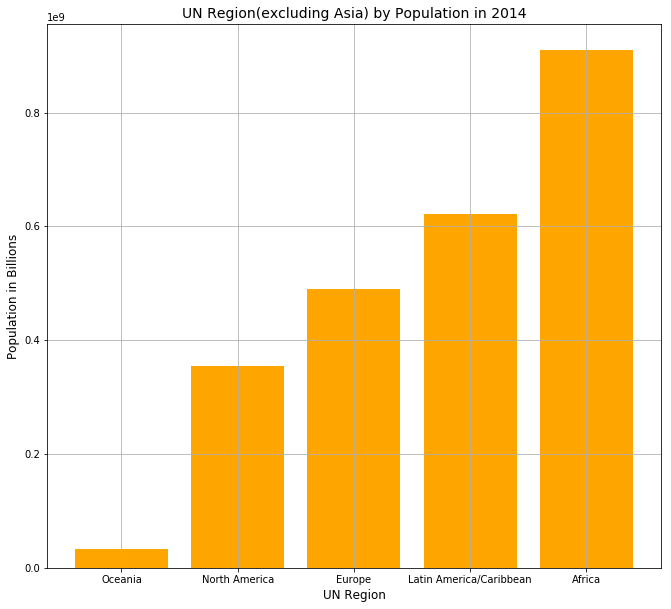

In [24]:
#Plotting UN region by population size without Asia
plt.figure(figsize=(11,10))
x = ['Oceania', 'North America', 'Europe', 'Latin America/Caribbean', 'Africa']
y = [32270000, 355099000, 489565000, 621487000, 909968000]
plt.bar(x,y, color='orange')
plt.title('UN Region(excluding Asia) by Population in 2014', fontsize=14)
plt.xlabel('UN Region', fontsize=12)
plt.ylabel('Population in Billions', fontsize=12)
plt.grid()
plt.show()

Overall, I think all scales of population distribution show us very valuable information.  I think the regional distribution of population is a fairly good indicators of population as a whole, while the subregions are harder to digest in terms of understanding the data visually.  While subregions may be a good scale to conduct analysis on to get more into the minutiae than regions, the groupings and how they are related aren't immediately clear.  

## 2. What are the five countries with the highest ecological deficits per capita?  Ecological reserves?

An <b>ecological deficit</b> is when the ecological footprint exceeds the biocapacity of a given country.  On the other hand, an <b>ecological reserve</b> is when the biocapacity of a country exceeds the ecological footprint.

The Ecological Footprint is determined by this formula: 

EF Consumption = EF Production + EF Imports - EF Exports

The Biocapcity is evaluated using the 'BiocapPerCap' record.  

In [25]:
#DataFrame with only the records of BiocapPerCap and EFConsPerCap per year
#countries_record = df_complete_footprint.loc[(df_complete_footprint['record'] == 'BiocapPerCap') | (df_complete_footprint['record'] == 'EFConsPerCap')]
#countries_record.to_csv('countries_record.csv')
#DataFrame with only the records of BiocapPerCap and EFConsPerCap per year with only relevant columns
#countries_record = countries_record[['country', 'UN_region', 'UN_subregion', 'record', 'total']]


In [26]:
#Table sum of Biocap , sum of EFCons, difference b/w, reserve/deficit per country
#pt_BCEF = (pd
        #.pivot_table(countries_record,values = 'total',index=['country'], columns=['record'], aggfunc='sum')[['BiocapPerCap','EFConsPerCap']]
        #.reset_index()
        #.set_index('country') )
#pt_BCEF['diff_BCEF'] = (pt_BCEF.BiocapPerCap - pt_BCEF.EFConsPerCap)
#pt_BCEF['deficit/reserve'] = ['reserve' if i > 0 else 'deficit' for i in pt_BCEF.diff_BCEF]
#pt_BCEF.to_csv('pt_BCEF.csv')
#pt_BCEF

In [27]:
pt_country = pd.read_csv('pt_BCEF.csv')
pt_country.rename(columns={'deficit/reserve':'deficit_reserve'}, inplace=True)
pt_country.head(5)

,country,BiocapPerCap,EFConsPerCap,diff_BCEF,deficit_reserve
0,Afghanistan,45.534687,49.278768,-3.744081,deficit
1,Albania,59.858982,102.702357,-42.843375,deficit
2,Algeria,44.200154,75.291155,-31.091000,deficit
3,Angola,294.252271,52.427720,241.824550,reserve
4,Argentina,412.298582,189.644337,222.654244,reserve


The dataframe above lists all the countries, the sums of the 'BiocapPerCap' and 'EFConsPerCap' land type totals for all years, the difference between the 'BiocapPerCap' and 'EFConsPerCap', and the status of the country(deficit/reserve).  All positive numbers in 'diff_BCEF' indicate that the Biocapity of a country support the Ecological Footprint (reserve), whereas the negative numbers represent that the country's demand outweighs their natural resources and is in an ecological deficit. 

In [28]:
#High level descriptive stats overview
pt_country.describe()

,BiocapPerCap,EFConsPerCap,diff_BCEF
count,128.000000,128.000000,128.000000
mean,250.806250,149.081244,101.725006
std,507.898559,118.544398,506.943567
min,7.876680,27.554852,-625.067185
25%,48.586268,72.112223,-73.637993
50%,91.583721,101.141476,-14.823748
75%,216.350252,190.853788,109.103620
max,4114.567153,728.924045,3985.788106


In [29]:
reserve_df = pt_country.loc[(pt_country.deficit_reserve == 'reserve')]
deficit_df = pt_country.loc[(pt_country.deficit_reserve == 'deficit')]
deficit_df_sort = deficit_df.sort_values('diff_BCEF', ascending=False)
reserve_df_sort= reserve_df.sort_values('diff_BCEF', ascending=True)

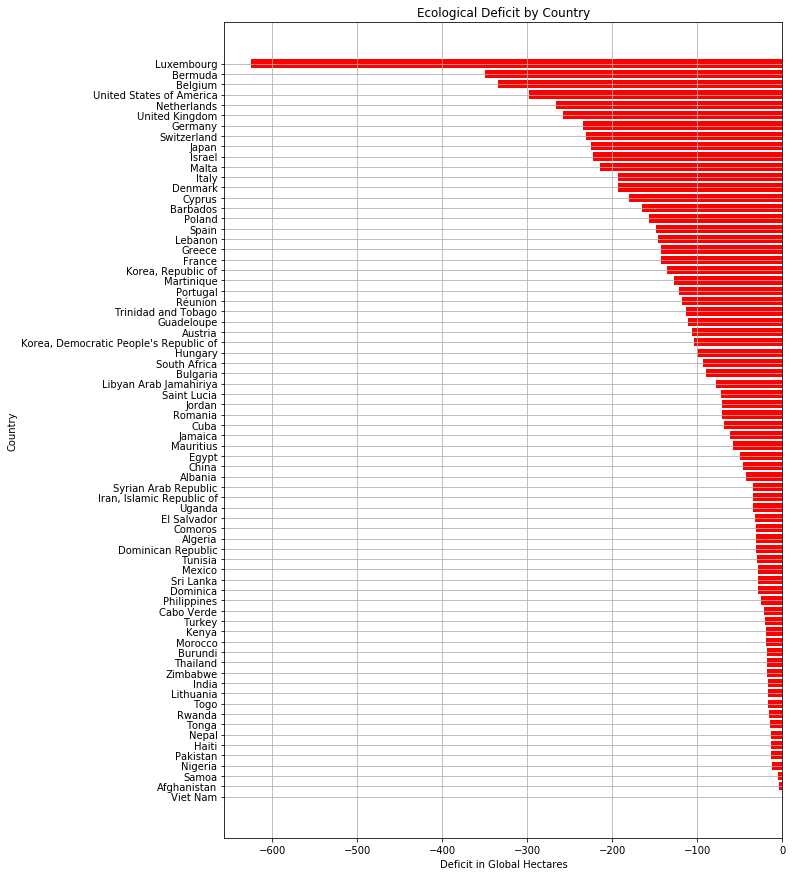

In [30]:
plt.figure(figsize=(10,15))
x = deficit_df_sort['country']
y = deficit_df_sort['diff_BCEF']
plt.barh(x,y, color='red')
plt.title('Ecological Deficit by Country')
plt.xlabel('Deficit in Global Hectares')
plt.ylabel('Country')
plt.grid()
plt.show()

The plot above shows that the five countries with the largest ecological deficit are Luxembourg, Burmuda, Belgium, United States of America, and the Netherlands. Luxembourg, by far, has the largest ecological deficit almost doubling that of Burmuda's.  

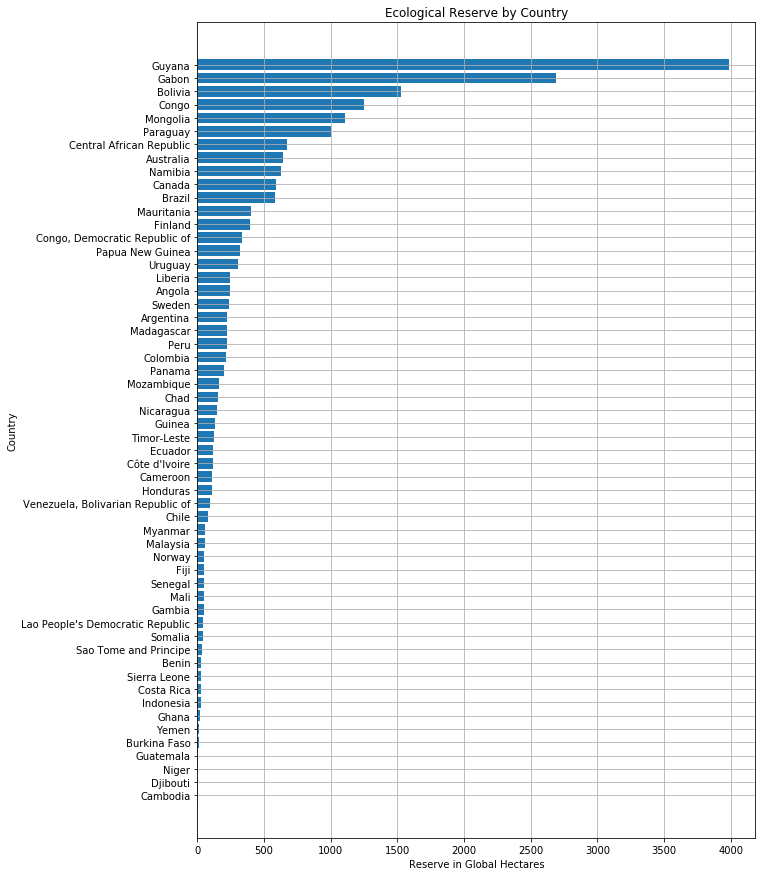

In [31]:
plt.figure(figsize=(10,15))
x = reserve_df_sort['country']
y = reserve_df_sort['diff_BCEF']
plt.barh(x,y)
plt.title('Ecological Reserve by Country')
plt.xlabel('Reserve in Global Hectares')
plt.ylabel('Country')
plt.grid()
plt.show()

The five countries with the largest ecological reserves are Guyana, Gabon, Bolivia, Congo, and Mongolia.  

Overall, the amount of reserve in global hectares those with a deficit. For example, the 15 countries with the largest ecological reserve have more global hectares than Luxembourg, the country with the largest ecological deficit.  

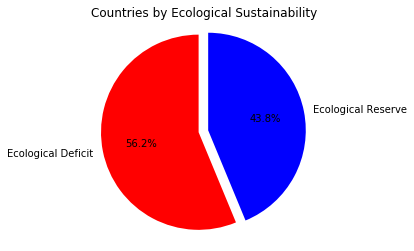

In [32]:
labels = ['Ecological Deficit', 'Ecological Reserve']
deficit_reserve = [72.0, 56.0]
colors = ['red', 'blue']
explode = (0, 0.1)

plt.pie(deficit_reserve, labels=labels, startangle=90, colors=colors, autopct='%1.1f%%', explode=explode)
plt.title('Countries by Ecological Sustainability')
plt.axis('equal')
plt.show()



Of the 128 countries we have 54 years of data on, 56.2% are in an ecological deficit.  43.8% are in an ecological reserve.

## 3. Which region has the highest average GDP Percapita growth rate between 2004 and 2014? 

In [33]:
#Create DataFrame for years between 2004 and 2014
#footprint_decade = complete_footprint.loc[(complete_footprint['year'] >= 2004) & (complete_footprint['year']<=2014) & (complete_footprint['record'] == 'BiocapPerCap')]
footprint_decade = pd.read_csv('footprint_decade.csv')
footprint_decade.head()

,Unnamed: 0,Unnamed: 0.1,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,430,660,Afghanistan,AFG,Asia,Southern Asia,2004,BiocapPerCap,0.197113,0.252525,0.026351,0.0,0.026837,0.0,0.502825,364.095,23500000
1,440,670,Afghanistan,AFG,Asia,Southern Asia,2005,BiocapPerCap,0.286608,0.242050,0.025345,0.0,0.040521,0.0,0.594524,389.416,24400000
2,450,680,Afghanistan,AFG,Asia,Southern Asia,2006,BiocapPerCap,0.235769,0.234053,0.024604,0.0,0.034404,0.0,0.528830,397.986,25184000
3,460,690,Afghanistan,AFG,Asia,Southern Asia,2007,BiocapPerCap,0.286611,0.227515,0.023898,0.0,0.042975,0.0,0.580999,440.368,25878000
4,470,700,Afghanistan,AFG,Asia,Southern Asia,2008,BiocapPerCap,0.188535,0.222551,0.023275,0.0,0.028981,0.0,0.463343,444.950,26529000


In [34]:
#DataFrames for each region, 2004-2014
ft_decade_Asia = footprint_decade[footprint_decade['UN_region']=='Asia']
ft_decade_Africa = footprint_decade[footprint_decade['UN_region']=='Africa']
ft_decade_Europe = footprint_decade[footprint_decade['UN_region']=='Europe']
ft_decade_NorthAmerica = footprint_decade[footprint_decade['UN_region']=='North America']
ft_decade_LatinAmerica = footprint_decade[footprint_decade['UN_region']=='Latin America and the Caribbean']
ft_decade_Oceania = footprint_decade[footprint_decade['UN_region']=='Oceania']

In [35]:
#Calculates average GDP of all countries in region for each year 
plot_Asia = ft_decade_Asia.groupby('year')['Percapita GDP (2010 USD)'].mean()
plot_Africa = ft_decade_Africa.groupby('year')['Percapita GDP (2010 USD)'].mean()
plot_Europe = ft_decade_Europe.groupby('year')['Percapita GDP (2010 USD)'].mean()
plot_NA = ft_decade_NorthAmerica.groupby('year')['Percapita GDP (2010 USD)'].mean()
plot_LA = ft_decade_LatinAmerica.groupby('year')['Percapita GDP (2010 USD)'].mean()
plot_Oceania = ft_decade_Oceania.groupby('year')['Percapita GDP (2010 USD)'].mean()

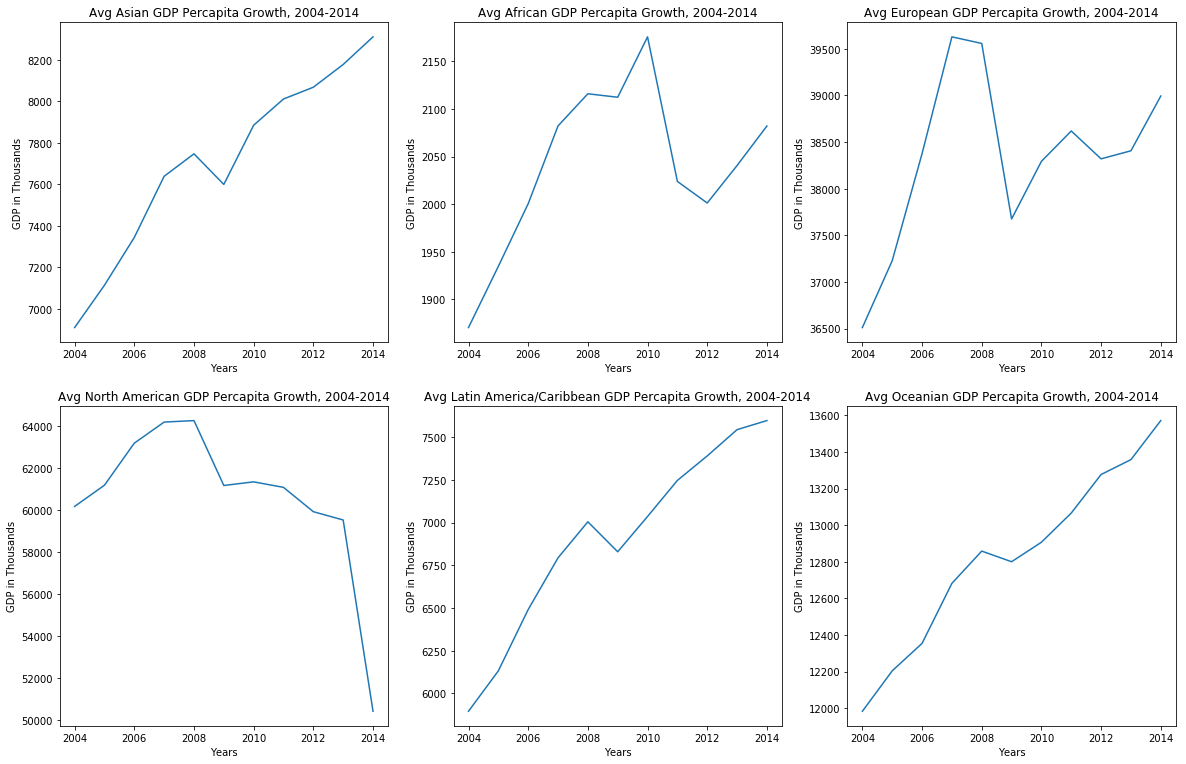

In [36]:
#Line graphs by region: Average GDP Percapita
plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
plt.plot(plot_Asia)
plt.title('Avg Asian GDP Percapita Growth, 2004-2014')
plt.xlabel('Years')
plt.ylabel('GDP in Thousands')

plt.subplot(3,3,2)
plt.plot(plot_Africa)
plt.title('Avg African GDP Percapita Growth, 2004-2014')
plt.xlabel('Years')
plt.ylabel('GDP in Thousands')

plt.subplot(3,3,3)
plt.plot(plot_Europe)
plt.title('Avg European GDP Percapita Growth, 2004-2014')
plt.xlabel('Years')
plt.ylabel('GDP in Thousands')

plt.subplot(3,3,4)
plt.plot(plot_NA)
plt.title('Avg North American GDP Percapita Growth, 2004-2014')
plt.xlabel('Years')
plt.ylabel('GDP in Thousands')

plt.subplot(3,3,5)
plt.plot(plot_LA)
plt.title('Avg Latin America/Caribbean GDP Percapita Growth, 2004-2014')
plt.xlabel('Years')
plt.ylabel('GDP in Thousands')

plt.subplot(3,3,6)
plt.plot(plot_Oceania)
plt.title('Avg Oceanian GDP Percapita Growth, 2004-2014')
plt.xlabel('Years')
plt.ylabel('GDP in Thousands')

plt.show()

Looking at the plots shows each regions' trends, but does not offer a conclusive answer to our question.  

First of all, we see that there are three regions(Asia, Latin America/Caribbean, Oceania) that have a steady upward trend with a minor dip around 2009.  It is clear that one of these three will have the highest growth rate but without further calculation it is unclear which region it is. 

Next, Africa and Europe show initially steep growth rates, but both regions dramatically plunge.  While Europe manages to recover, Africa's drop was more severe and the subsequent growth was exclusively upward but didn't rebound to the highest GDP in 2010.  

Last, North America is the only country with a negative growth rate.  While the region starts off at the highest GDP, it only initially shows a small upward trend that is maintained until 2008.  After that the GDP drops and levels off.  Around 2013, the GDP severely drops.

In [37]:
#DataFrame with avg GDP for 2004, 2010, and growth rate
regions = ['Asia', 'Africa', 'Europe', 'North America', 'Latin America/Caribbean', 'Oceania']
growth_rates = pd.DataFrame(index=regions)
growth_rates['Avg GDP Percapita in 2004'] = [6910.59284, 1870.525775, 36510.901739, 60172.866667, 5895.241577, 11982.836]
growth_rates['Avg GDP Percapita in 2014'] = [8309.85152, 2082.074564, 38993.062174, 50424.750000, 7596.662308, 13571.284]
growth_rates['Growth Rates'] = [0.2025, 0.0853, 0.0679, -0.4413, 0.2886, 0.1326 ]
growth_rates

,Avg GDP Percapita in 2004,Avg GDP Percapita in 2014,Growth Rates
Asia,6910.592840,8309.851520,0.2025
Africa,1870.525775,2082.074564,0.0853
Europe,36510.901739,38993.062174,0.0679
North America,60172.866667,50424.750000,-0.4413
Latin America/Caribbean,5895.241577,7596.662308,0.2886
Oceania,11982.836000,13571.284000,0.1326


To determine the growth rate, I found the difference between the 'Avg GDP Percapita in 2014' and 'Avg GDP Percapita in 2004' and divided it by the 'Avg GDP Percapita in 2004'.  

Now that we have the calculated growth rates, here is the list of regions by highest to lowest GDP Percapita growth rates:

<b>1. Latin America/Caribbean: 28.86%</b>
2. Asia: 20.25%
3. Oceania: 13.26%
4. Africa: 8.53%
5. Europe: 6.79%
6. North America: -44.13%

While North America has a negative growth rate, it is still important to notice that the GDP in 2004 and 2014 was larger than any other region.  

# Proposing further research

## Detailed analysis of countries by geography to determine deficit/reserve

For a future analysis, I would be very interested in examining the geography and features of the countries to determine any trends in countries that are currently in an ecological reserve.  

<u>Possible topics to analyze</u>:
-Northern vs. Southern Hemisphere (Which hemisphere has more countries in an ecological reserve?)
-Size of country (Is relationship to population or to amount of biologically productive land more closely related to size of 
                  country?)
    -Relationship to population
    -Relationship to amount of biologically productive land 
-Presence/Absence and/or proximity to geographical features (What type of landscape is the most productive?  What type of land 
                                                             type renews itself the quickest?)
    -Ocean, Rivers, Mountains, Forests
-Transportation routes for trade (Import/Export question)
    -Trains, Ports, Airports
    
The first two questions I would be able to answer using this dataset.  For the Northern vs. Hemisphere question, I would conduct a similar analysis as I did for finding the ecological deficits and reserves for each country.  The size of the country to find trends in the size of population and natural resources could be done with just this dataset, but it would definitely benefit from the additional of further data, especially in regards to area. 

To tackle the rest of this analysis, I would need further data to complement the National Footprint Accounts that I have used for this project.  I would find high quality sources with data related to the above questions.

Overall, I think it is important to understand why some countries are in a reserve vs deficit.  I think it's even more vital to understand WHY those countries have the ecological sustainability status that they do.  Ultimately, understanding certain trends and metrics can hopefully help guide the insight into actionable steps to create a more sustainable future.    

